# EXPLORATORY DATA ANALYSIS  - Udemy Course

In [ ]:
Problem:
    
-  Memasuki tahun ajaran baru, kita ingin memberi penawaran menarik untuk mengetahui Subject yang paling digemari dengan harga 
    yang gratis

Goal:
    
- Mengoptimalkan dengan cara memberikan highlight atau harga potongan untuk course berdasarkan subject yang berpotensi mempunyai
    Subscriber yang tinggi
- Menentukan apakah jumlah review mempengaruhi jumlah subcsribers, maupun harga dengan jumlah subscribers

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px


#Mengexport data

df = pd.read_csv('udemy_courses.csv')



#Membuat deskripsi data

dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,course_id,int64,0,0.0,3672,"[434774, 520308]"
1,course_title,object,0,0.0,3663,"[Rockabilly Guitar For Beginners, Become a Pro..."
2,url,object,0,0.0,3672,[https://www.udemy.com/international-finance-a...
3,is_paid,bool,0,0.0,2,"[True, False]"
4,price,int64,0,0.0,38,"[190, 35]"
5,num_subscribers,int64,0,0.0,2197,"[3015, 4297]"
6,num_reviews,int64,0,0.0,511,"[1445, 449]"
7,num_lectures,int64,0,0.0,229,"[12, 37]"
8,level,object,0,0.0,4,"[Expert Level, All Levels]"
9,content_duration,float64,0,0.0,105,"[22.0, 30.0]"


In [119]:
# Membuat Course_id menjadi Index agar lebih mudah ditrace

df.set_index('course_id',inplace=True)

In [163]:
df.sort_values(by=['price'],ascending=False).head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
797040,Complete Guide to Front-End Web Development an...,https://www.udemy.com/complete-guide-to-front-...,True,200,1119,111,204,Beginner Level,16.5,2016-05-23T17:32:24Z,Web Development
481696,Code & Grow Rich: Earn More As An Entrepreneu...,https://www.udemy.com/code-grow-rich-earn-more...,True,200,7211,52,491,All Levels,57.0,2016-02-10T01:09:19Z,Web Development
975414,Contango VXX - ETF Options Trading - Double Yo...,https://www.udemy.com/contango-vxx-trading-idi...,True,200,513,20,20,All Levels,1.0,2016-10-06T15:10:38Z,Business Finance
1112604,Javascript Specialist,https://www.udemy.com/javascript-specialist/,True,200,408,39,80,Beginner Level,8.0,2017-02-23T00:54:07Z,Web Development


### Mencari Q1, Q3, IQR, Lower Fence, dan Upper Fence dari kolom Number of Subscriber

In [121]:
Q1 = df.describe()['num_subscribers']['25%']
Q3 = df.describe()['num_subscribers']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR) #WHISKER
Lower_Fence = Q1 - (1.5 * IQR) #WHISKER

print('Quartil 1: ', Q1)
print('Quartil 3: ', Q3)
print('Interquartil Range: ', IQR)
print('Upper Fence: ', Upper_Fence)
print('Lower Fence: ', Lower_Fence)

Quartil 1:  111.0
Quartil 3:  2546.0
Interquartil Range:  2435.0
Upper Fence:  6198.5
Lower Fence:  -3541.5


{'whiskers': [<matplotlib.lines.Line2D at 0x2830b6dbfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2830b6dbd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2830b6db6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2830b76cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2830b76c340>],
 'means': []}

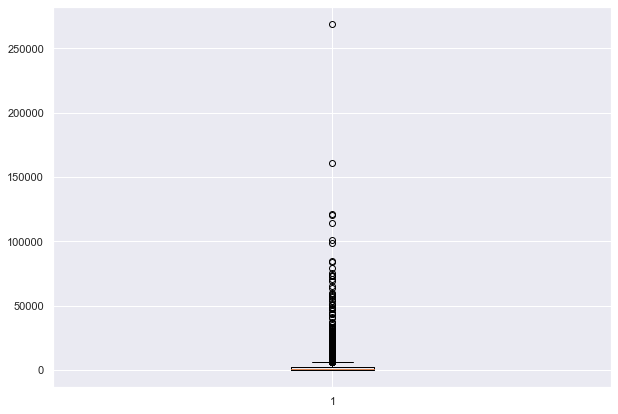

In [122]:
#Melihat penyebaran data Number of subsribers dengan boxplot

plt.figure(figsize=(10,7))
plt.boxplot(df['num_subscribers'])

subject
Web Development        7980572
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Name: num_subscribers, dtype: int64


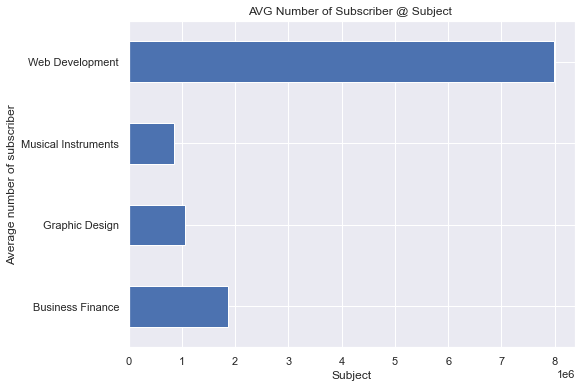

In [164]:
# Jumlah subscriber per Subject

Subject_Subs_mean = (df.groupby('subject')['num_subscribers'].sum()).round(2)
print(Subject_Subs_mean.sort_values(ascending=False))

plt.figure(figsize=(8,6))

bar = Subject_Subs_mean.plot(kind='barh')

plt.title('AVG Number of Subscriber @ Subject ')
plt.xlabel('Subject')
plt.ylabel('Average number of subscriber')
plt.show()

In [173]:
Course_sum=pd.crosstab(df['subject'], columns='SUM')
Course_sum

col_0,SUM
subject,
Business Finance,1195
Graphic Design,603
Musical Instruments,680
Web Development,1200


Text(0, 0.5, 'Subject')

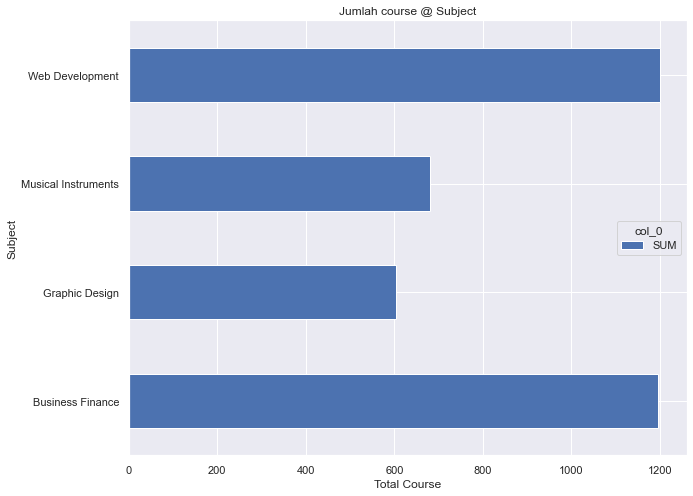

In [172]:
sns.set(rc={'figure.figsize':(10,8)})
Productlaku_bar = Course_sum.plot(kind='barh')
Productlaku_bar.set_title('Jumlah course @ Subject')
Productlaku_bar.set_xlabel('Total Course')
Productlaku_bar.set_ylabel('Subject')

## BUSINESS FINANCE

In [161]:
BusinessFinance=df.loc[(df['subject'] == 'Business Finance')]
BusinessFinance=df1_unisex.sort_values('num_subscribers',ascending=False)
BusinessFinance

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
492,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,False,0,65576,936,24,All Levels,8.000000,2013-04-20T02:25:22Z,Business Finance
143,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,False,0,56659,4397,16,Beginner Level,1.500000,2013-04-07T21:39:25Z,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.500000,2013-12-25T19:53:34Z,Business Finance
119,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,False,0,29167,1463,8,Intermediate Level,1.500000,2014-05-27T16:22:16Z,Business Finance
40,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,True,195,24481,2347,174,All Levels,10.000000,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
779,1249146,Planning and Executing a Financial Statement A...,https://www.udemy.com/planning-executing-finan...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29T23:18:51Z,Business Finance
781,975910,How to achieve personal transformation,https://www.udemy.com/learnhowtocreatewealth/,True,20,0,0,10,All Levels,0.533333,2016-12-22T00:28:07Z,Business Finance
887,1058852,Learn to trade using technical analysis,https://www.udemy.com/learn-to-trade-using-tec...,True,50,0,0,6,Intermediate Level,0.533333,2017-05-02T13:15:53Z,Business Finance
890,715476,The Cuckoo Strategy to get European Funding,https://www.udemy.com/the-cuckoo-strategy-to-g...,True,160,0,0,6,All Levels,1.000000,2016-01-06T02:38:23Z,Business Finance


Text(0.5, 1.0, 'Price x Number of Subscriber (Business Finance)')

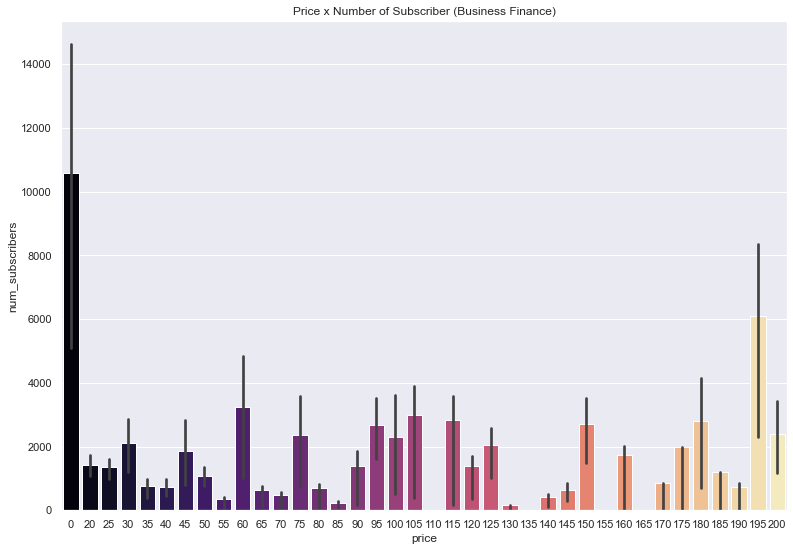

In [142]:
#Mengetahui seberapa banyak subscriber terhadap harga 

plt.figure(figsize=(13,9))

BusinessFinanceBar=sns.barplot(x = BusinessFinance['price'], y = BusinessFinance['num_subscribers'], estimator=np.std,palette='magma')
BusinessFinanceBar.set_title('Price x Number of Subscriber (Business Finance)')

## WEB DEVELOPMENT

In [160]:
WebDevelopment=df.loc[(df['subject'] == 'Web Development')]
WebDevelopment=WebDevelopment.sort_values('num_subscribers',ascending=False)
WebDevelopment

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development
59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development
625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development
764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,True,200,50,5,60,Beginner Level,5.0,2017-05-29T17:56:24Z,Web Development
1277924,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,True,40,44,0,68,All Levels,8.5,2017-07-06T15:04:55Z,Web Development
1248172,Essentials of Spring 5.0 for Developers,https://www.udemy.com/essentials-of-spring-50-...,True,125,34,2,21,Expert Level,1.5,2017-06-11T18:34:40Z,Web Development


Text(0.5, 1.0, 'Price x Number of Subscriber (Web Development)')

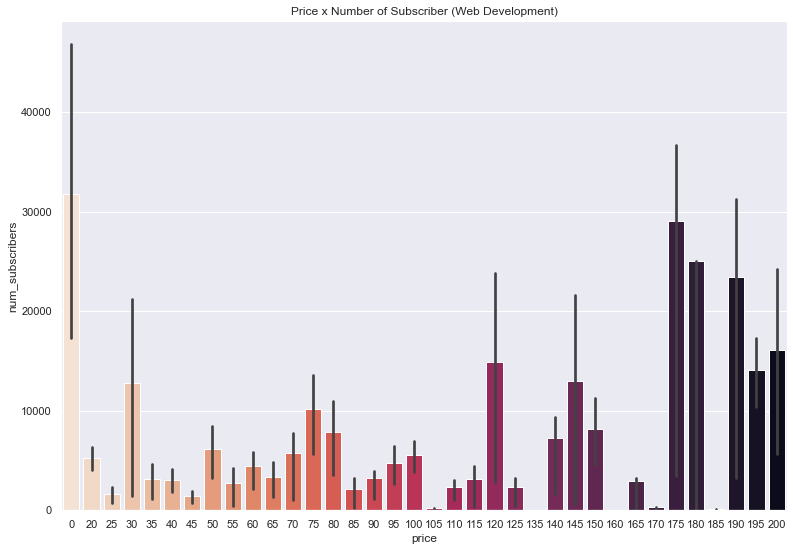

In [155]:
plt.figure(figsize=(13,9))

WebDevBar=sns.barplot(x = WebDevelopment['price'], y = WebDevelopment['num_subscribers'], estimator=np.std,palette='rocket_r')
WebDevBar.set_title('Price x Number of Subscriber (Web Development)')

## MUSICAL INSTRUMENT

In [159]:
Music=df.loc[(df['subject'] == 'Musical Instruments')]
Music=Music.sort_values('num_subscribers',ascending=False)
Music

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.500000,2012-06-15T17:00:33Z,Musical Instruments
238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.000000,2014-08-07T06:27:51Z,Musical Instruments
41884,Getting Started with Playing Guitar,https://www.udemy.com/getting-started-with-pla...,False,0,47652,1141,26,Beginner Level,4.000000,2013-05-29T15:28:07Z,Musical Instruments
42271,Complete Guitar System - Beginner to Advanced,https://www.udemy.com/complete-guitar-system-b...,True,145,32935,2713,310,All Levels,34.000000,2013-05-29T15:24:47Z,Musical Instruments
26956,Learn Guitar in 21 Days,https://www.udemy.com/learn-guitar-in-21-days/,True,20,26504,192,82,Beginner Level,2.500000,2012-10-21T20:36:50Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,2017-06-20T21:46:40Z,Musical Instruments
1234656,4 Week Rhythm Mastery,https://www.udemy.com/4-week-rhythm-mastery/,True,20,0,0,28,Beginner Level,2.500000,2017-07-05T16:07:44Z,Musical Instruments
1026762,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,True,125,0,0,7,All Levels,0.633333,2017-03-10T17:06:46Z,Musical Instruments


Text(0.5, 1.0, 'Price x Number of Subscriber (Music Instrumentals)')

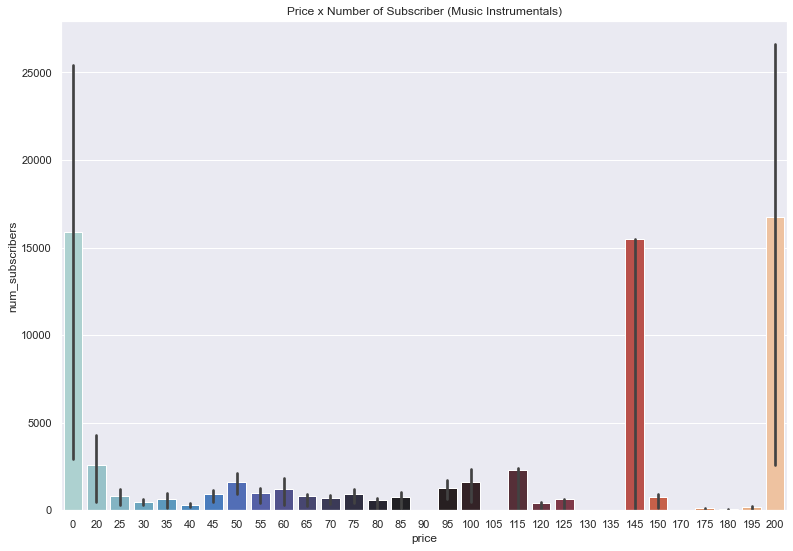

In [148]:
plt.figure(figsize=(13,9))

MusicBar=sns.barplot(x = Music['price'], y = Music['num_subscribers'], estimator=np.std,palette='icefire')
MusicBar.set_title('Price x Number of Subscriber (Music Instrumentals)')

## GRAPHIC DESIGN

In [158]:
GraphicDesign=df.loc[(df['subject'] == 'Graphic Design')]
GraphicDesign=GraphicDesign.sort_values('num_subscribers',ascending=False)
GraphicDesign

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
348116,Photoshop In-Depth: Master all of Photoshop's ...,https://www.udemy.com/photoshop-tools/,False,0,53851,1779,45,All Levels,4.500000,2014-11-30T04:22:11Z,Graphic Design
17349,Figure Drawing From Life Using The Reilly Tech...,https://www.udemy.com/figure-drawing-from-life...,False,0,47811,1041,22,All Levels,2.500000,2012-05-09T18:14:57Z,Graphic Design
399938,Professional Logo Design in Adobe Illustrator,https://www.udemy.com/professional-logo-design...,False,0,44044,1563,45,All Levels,7.500000,2015-01-22T11:18:06Z,Graphic Design
820194,Photoshop for Entrepreneurs - Design 11 Practi...,https://www.udemy.com/photoshop-for-entreprene...,True,200,36288,737,63,All Levels,5.000000,2016-06-09T01:57:03Z,Graphic Design
249126,Logo Design Essentials,https://www.udemy.com/logo-design/,True,20,33205,481,12,All Levels,0.700000,2014-06-30T03:09:27Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
987865,Make Patterns in Illustrator,https://www.udemy.com/make-patterns-in-illustr...,True,20,0,0,32,Beginner Level,3.500000,2017-05-25T15:31:11Z,Graphic Design
1047408,Easy Coloring Book Design,https://www.udemy.com/easy-coloring-book-design/,True,25,0,0,9,Beginner Level,0.583333,2016-12-22T00:46:38Z,Graphic Design
1137738,Photoshop - Creación de Efectos,https://www.udemy.com/photoshop-creacion-de-ef...,True,20,0,0,11,Beginner Level,1.000000,2017-03-24T20:06:57Z,Graphic Design


Text(0.5, 1.0, 'Price x Number of Subscriber (Graphic Design)')

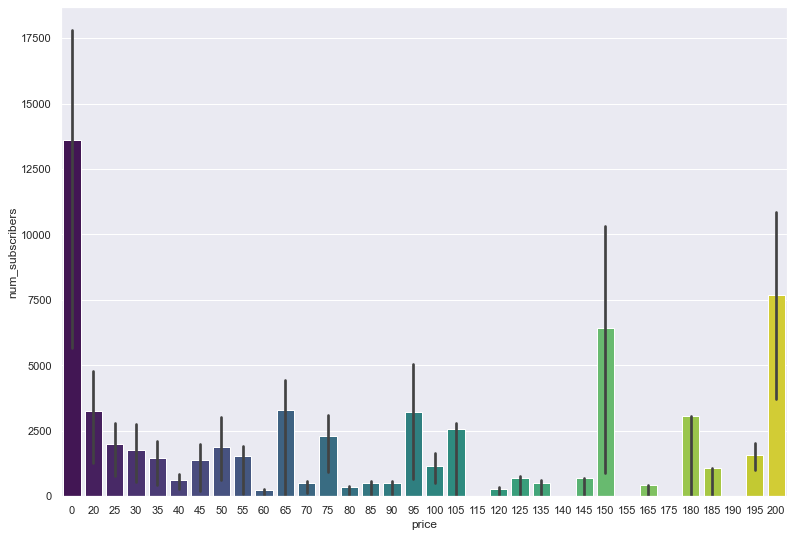

In [150]:
plt.figure(figsize=(13,9))

GraphicDesignBar=sns.barplot(x = GraphicDesign['price'], y = GraphicDesign['num_subscribers'], estimator=np.std,palette='viridis')
MusicBar.set_title('Price x Number of Subscriber (Graphic Design)')

In [55]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

### Korelasi antara number of subscribers dan number of reviews terhadap jenis subject

In [165]:
df[['num_subscribers', 'num_reviews']].describe()

,num_subscribers,num_reviews
count,3678.000000,3678.000000
mean,3197.150625,156.259108
std,9504.117010,935.452044
min,0.000000,0.000000
25%,111.000000,4.000000
50%,911.500000,18.000000
75%,2546.000000,67.000000
max,268923.000000,27445.000000


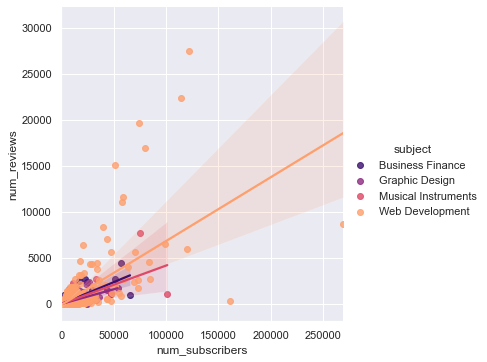

In [54]:
x1=sns.lmplot(x = 'num_subscribers', y = 'num_reviews', data=df, hue='subject',palette='magma')
x1

# Kesimpulan

Course gratis alias tanpa biaya sangatlah mendominasi valuasi dari semua subject yang ada di Udemy. Business Finance dan
Web Development menunjukkan, bahwa kedua subject tersebut mendominasi jumlah course dengan jumlah masing-masing subject hampir
1200 course.Jelas dijabarkan, bahwa Business Finance dan Web Development paling digemari, dengan angka hampir menyentuh 8 juta 
unduhan, hal kontras terjadi di subject Musical Instruments dengan jumlah kurang lebih 800 ribu unduhan. 

Menarik adalah ketika kita mengamati penyebaran data harga dan jumlah subscriber di semua subject. Jumlah subscriber paling 
banyak ada di angka 0 (gratis), tetapi angka termahal pun($200) dan mempunyai jumlah subscriber yang cukup banyak, bahkan 
cenderung melebihi course yang mempunyai harga di antaranya.

Residplot menunjukan bahwa semakin banyak suatu course memilik review dari user, maka angka subscribernya pun semakin bertambah.

# Rekomendasi

Memiliki keahlian lain selain di bidang akademisi sekolah atau universitas akan memberikan nilai tambah untuk seorang pelajar
maupun mahasiswa, ketimbang melakukan demonstrasi dan tawuran di jalan. Mengikuti kursus di Udemy merupakan pilihan yang jitu
untuk menambah nilai jual seseorang. Bakat dan ketertarikan seseorang akan mempengaruhi jenis kursus mana yang diminati. 
Seiring dengan perkembangan jaman dan peralihan dunia ke industri digital, merupakan salah satu faktor mengapa tingginya angka
subscriber dan jumlah kursus yang dapat diikuti di Udemy. Mempelajari HTML dan Basic Coding bisa menjadi modal yang kuat untuk
menyongsong era 'New Normal' ini. Untuk Individu yang juga menggemari seni dan desain grafis, dapat mengikuti kursus Photoshop, 
yang bilamana di masa yang akan datang bisa digabungi dengan HTML menjadi Front End Developer dan seorang UI/UX Researcher handal.

Beberapa contoh rekomendasi course untuk menyambut era digital:
    1. Learn HTML5 Programming From Scratch
    2. Coding for Entrepreneurs Basic
    3. Photoshop In-Depth: Master all of Photoshop's
    4. Build Your First Website in 1 Week with HTML5 
    5. Figure Drawing From Life Using The Reilly Tech
    6. Professional Logo Design in Adobe Illustrator
    
    